Ahora veremos un problema introductorio clásico de visión por computadora: clasificación MNIST, digitos escritos a manos. Es simple, dada una imagen, calsifique el digito al cual pertenezca.

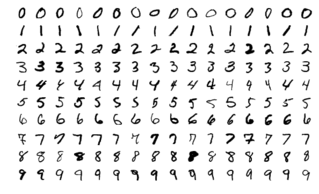



http://yann.lecun.com/exdb/mnist/



La base de datos MNIST de dígitos escritos a mano tiene un conjunto de entrenamiento de 60.000 ejemplos y un conjunto de prueba de 10.000 ejemplos. Los dígitos se normalizaron en tamaño y se centraron en una imagen de tamaño fijo.
Es una buena base de datos para las personas que desean probar técnicas de aprendizaje y métodos de reconocimiento de patrones en datos del mundo real mientras dedican un esfuerzo mínimo al preprocesamiento y formato.
Cada imagen del conjunto de datos MNIST es de 28x28 y contiene un dígito centrado en escala de grises. Nuestra CNN tomará una imagen y generará una de las 10 clases posibles (una para cada dígito).

In [ ]:
!pip install tensorflow==2.8.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 78.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 46.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 83.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 106.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 68.0 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Successfully uninstalled tensorboard-data-server-0.7.2
  Attempting uninstall: google-auth-oauthlib
    Found existing

**<h1> Importar las librerías necesarias</h1>**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
import matplotlib.pyplot as plt
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


**<h1>Preparación de los datos</h1>**



In [ ]:
#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print(X_train.shape) # (60000, 28, 28)
print(y_train.shape) # (60000,)

print(X_test.shape) # (10000, 28, 28)
print(y_test.shape) # (10000,)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


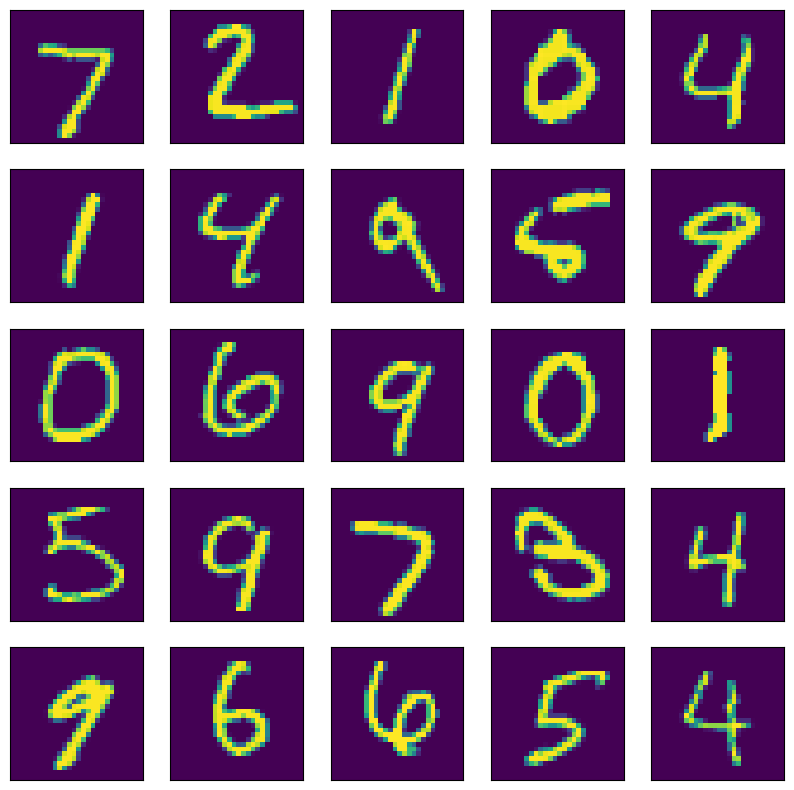

In [ ]:
#plot the firsts 25 images in the dataset

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i])
plt.show()

In [ ]:
#check image shape
X_train[0].shape

(28, 28)

In [ ]:
#reshape data to fit model
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Hay una cosa con la que debemos tener cuidado: Keras espera que los objetivos de entrenamiento sean vectores de 10 dimensiones, ya que hay 10 nodos en nuestra capa de salida Softmax. En este momento, nuestras matrices train_labels y test_labels contienen enteros únicos que representan la clase para cada imagen.

In [ ]:
print(y_train[0]) # 5

5


Convenientemente, Keras tiene un método de utilidad que soluciona este problema exacto: to_categorical. En su lugar, convierte nuestra matriz de enteros de clase en una matriz de vectores one-hot. Por ejemplo, 2 se convertiría en [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] (tiene un índice cero).

In [ ]:
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

**<h1> Creación del modelo </h>**

Cada modelo de Keras se construye utilizando la clase Sequential, que representa una pila lineal de capas, o la clase de Modelo funcional, que es más personalizable. Usaremos el modelo secuencial, que es más simple, ya que nuestra CNN será una pila lineal de capas. El constructor secuencial toma una matriz de capas de Keras. Usaremos 3 tipos de capas para nuestra CNN: **Convolutional, Max Pooling y Softmax.**

In [ ]:
#create model -- Se debe modificar este modelo usando las condiciones abajo descritas
model = Sequential()

#add model layers
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(28,28,1))) #Número de filtros, tamaño de filtro, función de activación y tamaño imagen de entrada (solo para la 1era convolución)
model.add(MaxPooling2D(pool_size=2)) #tamaño del filtro de max pooling
model.add(Flatten()) #Convertir la matrix final en un vector de características
model.add(Dense(10, activation='softmax')) #red neuronal con 10 salidas (coincidir con el # de clases), función de activación

num_filters, filter_size y pool_size son variables autoexplicativas que establecen los hiperparámetros de nuestra CNN.
**La primera capa en cualquier modelo secuencial debe especificar input_shape, así que lo hacemos en Conv2D.** Este argumento debe ser el tamaño de la imagen: 28x28x1. Dado que las imágenes están en formato gris, la tercera dimensión de la imagen es 1. Una vez que se especifica esta forma de entrada, Keras inferirá automáticamente las formas de las entradas para capas posteriores. La capa Softmax de salida tiene 10 nodos, uno para cada clase.

**<h1>Filtros</h1>**

El propósito principal de la convolución es encontrar características en la imagen utilizando un detector de características. Luego, posicionarlos en un mapa de características que conserva las características distintivas de las imágenes. El detector de características, que se conoce como filtro, también se inicializa aleatoriamente y luego, después de muchas iteraciones, se selecciona el parámetro de matriz de filtro que será el mejor para separar imágenes. Por ejemplo, el ojo, la nariz, etc. de los animales se considerará una característica que se utiliza para clasificar imágenes mediante filtros o detectores de características. Aquí estamos usando 64 filtros.

**<h1>Kernel_size</h1>**

Kernel_size se refiere al tamaño de la matriz del filtro. Aquí estamos usando un tamaño de filtro de 3 * 3.

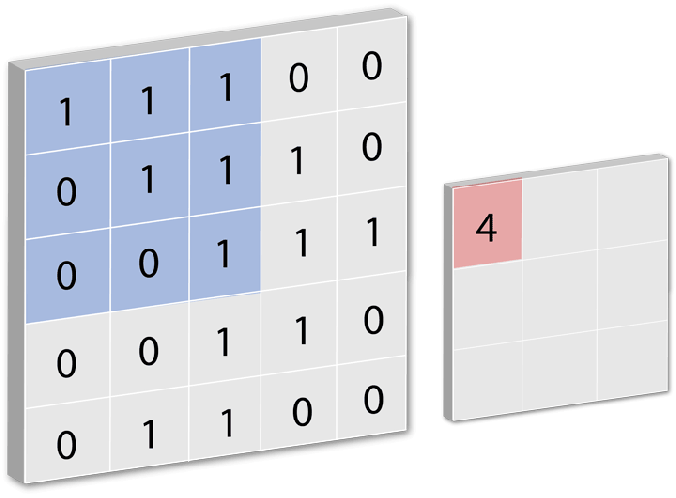

**<h1>Relleno (padding)</h1>**


1. Para una imagen en escala de grises (n x n) y (f x f) filtro / kernel, las dimensiones de la imagen resultante de una operación de convolución es (n - f + 1) x (n - f + 1)
2. Los píxeles, ubicados en las esquinas, tienen muy poca contribución en comparación con los píxeles del medio.


Entonces, por ejemplo, una imagen de 5 * 7 y un tamaño de filtro de 3 * 3, el resultado de salida después de la operación de convolución sería un tamaño de 3 * 5. Por lo tanto, la imagen se encoge cada vez que se realiza la operación convolucional. Para mitigar estos problemas, se realiza la operación de relleno. El relleno es un proceso simple de agregar capas con 0 o -1 a las imágenes de entrada para evitar los problemas mencionados anteriormente.

Aquí estamos usando Padding = valid

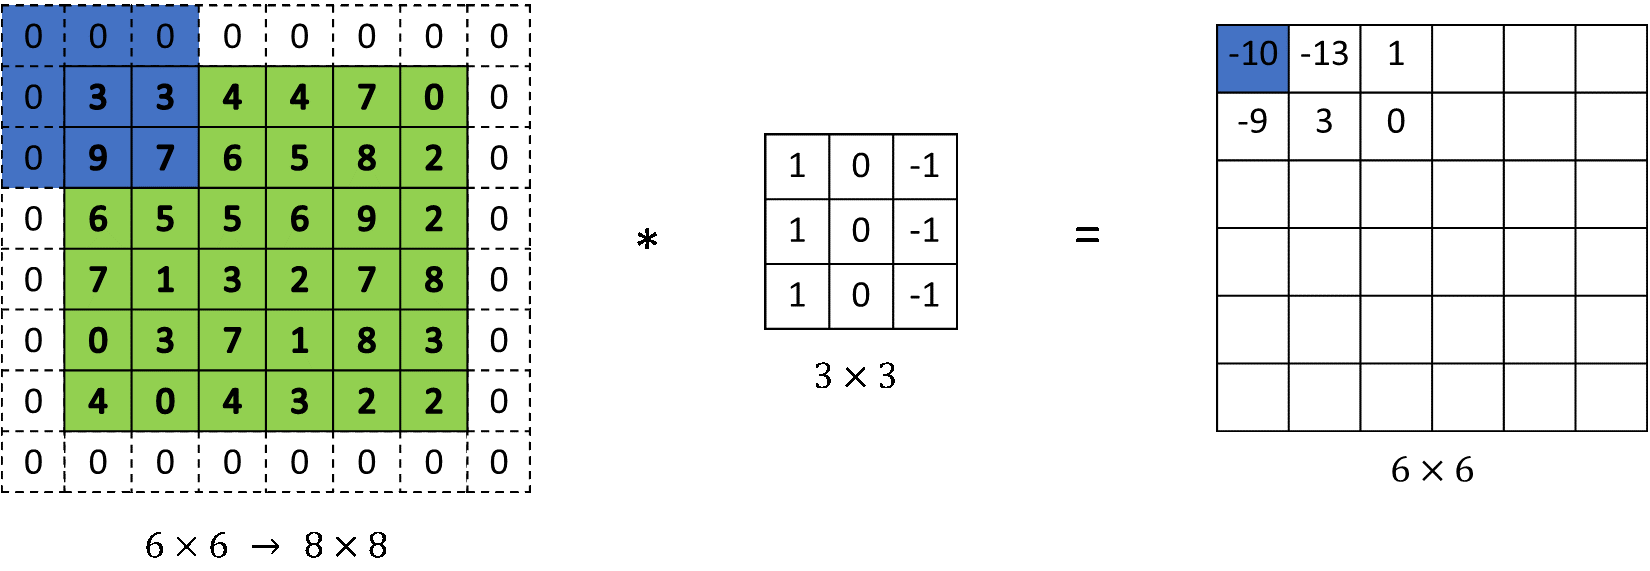

**<h1>Función de activación - Relu </h1>**
Dado que las imágenes no son lineales, para traer no linealidad, la función de activación relu se aplica después de la operación convolucional. Relu significa función de activación lineal rectificada. La función Relu generará la entrada directamente si es positiva; de lo contrario, generará cero.

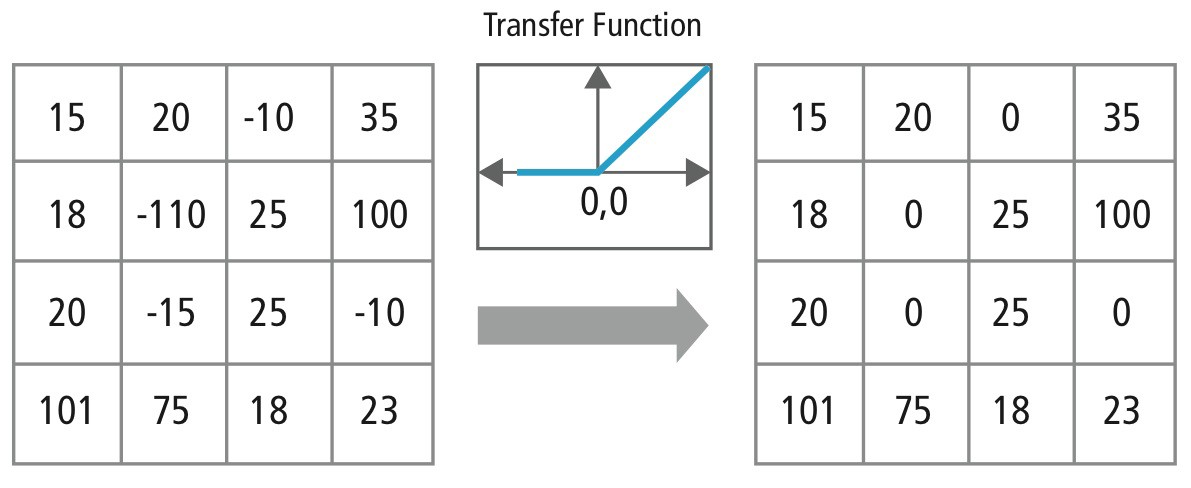

**<h1>Operación de Pooling</h1>**
Necesitamos aplicar la operación de pooling después de inicializar CNN. La agrupación es una operación de muestreo descendente de la imagen. La capa de agrupación se utiliza para reducir las dimensiones de los mapas de características. Por lo tanto, la capa Pooling reduce la cantidad de parámetros a aprender y reduce el cálculo en la red neuronal.

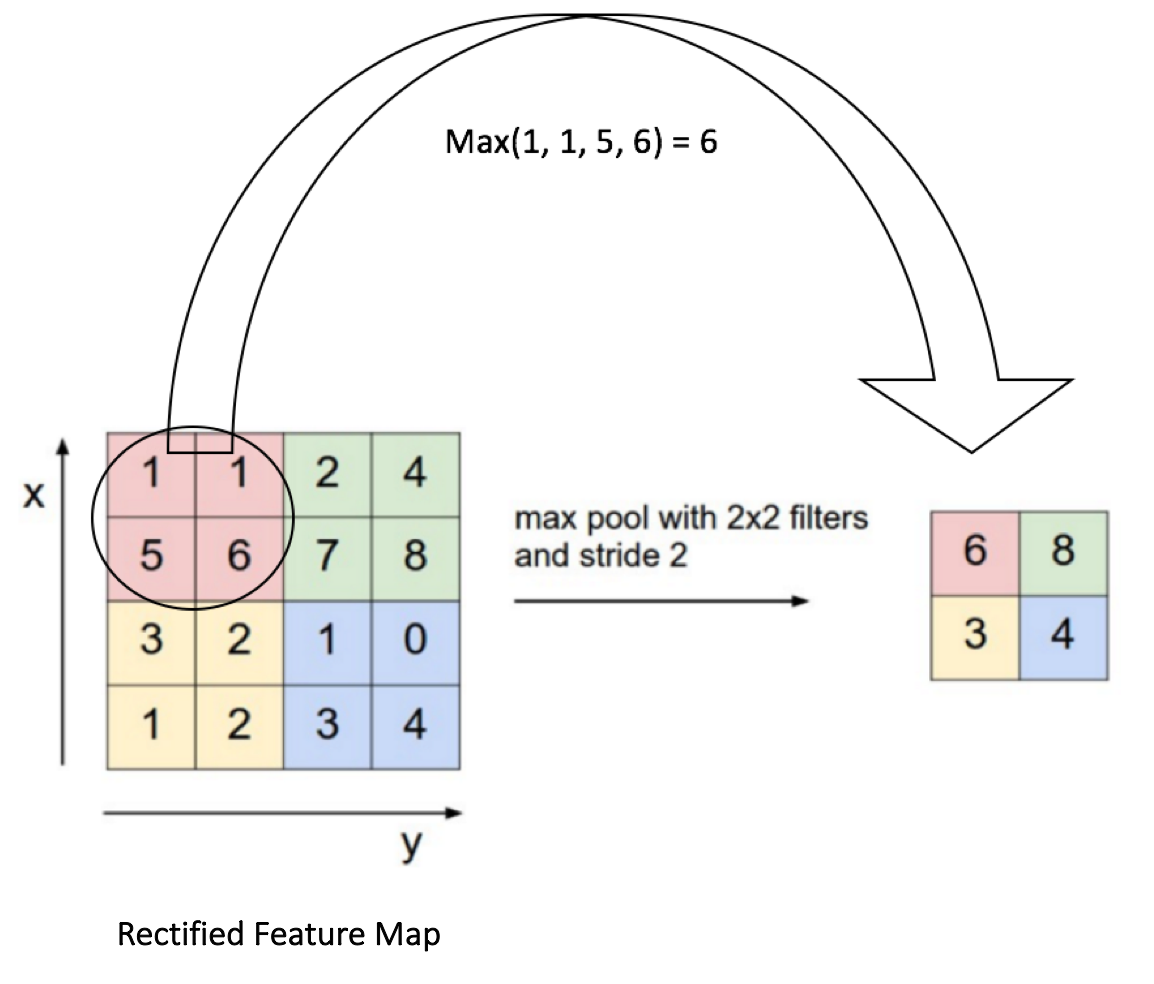

**<h1> Operación de aplanamiento (Flatten)</h1>**

La operación de aplanamiento es convertir el conjunto de datos en una matriz 1-D. Después de terminar los 3 pasos, ahora aplanamos el mapa de características porque necesitamos insertar estos datos 1-D en una capa de red neuronal artificial.

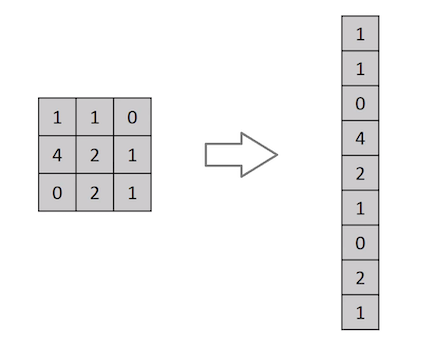

**<h1> Capa red neuronal (Fully Connected) y capa de salida </h1>**
La salida de la operación de aplanamiento funciona como entrada para la red neuronal. El objetivo de la red neuronal artificial hace que la red neuronal convolucional sea más avanzada y lo suficientemente capaz de clasificar imágenes. Aquí estamos usando una clase densa de la biblioteca de Keras para crear una capa completamente conectada y una capa de salida.

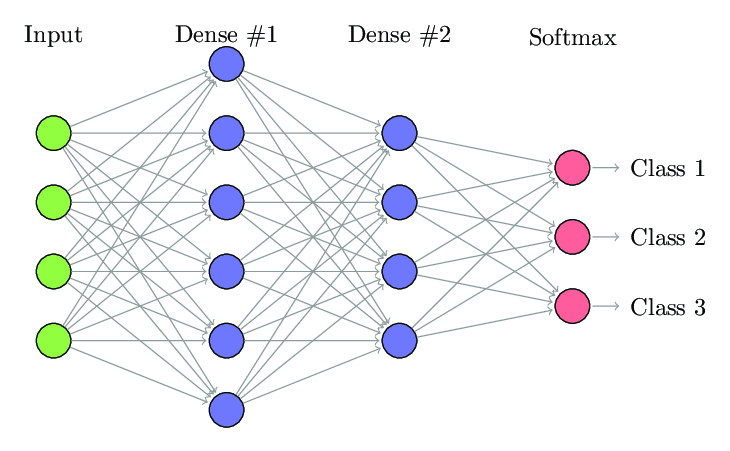

**<h1>Función de activación de Softmax </h1>**

Se utiliza como la última función de activación de una red neuronal para llevar la salida de la red neuronal a una distribución de probabilidad sobre las clases de predicción. La salida de Softmax está en probabilidades de cada resultado posible para predecir la clase. La suma de probabilidades debe ser una para todas las posibles clases de predicción.

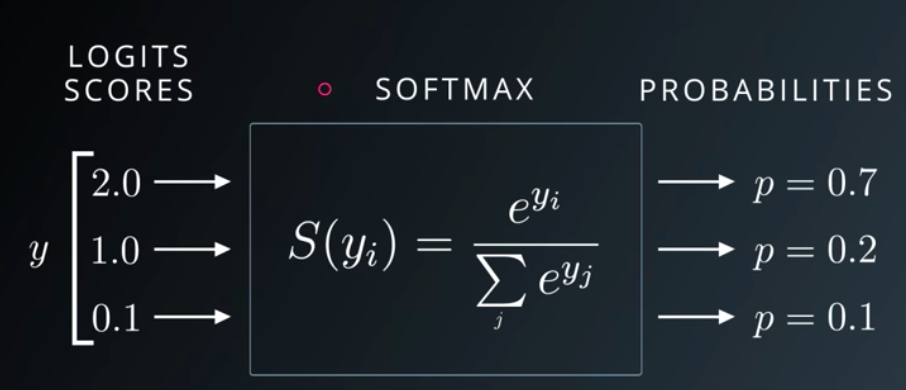

Visualicemos las capas que se crearon en el paso anterior usando la función summary. Esto mostrará algunos parámetros (pesos y bias) en cada capa y también los parámetros totales en su modelo.

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


**<h1>Compilando el modelo</h1>**

Antes de que podamos comenzar a entrenar, debemos configurar el proceso de entrenamiento. Decidimos 3 factores clave durante el paso de compilación:

**El optimizador.** Nos quedaremos con un valor predeterminado: el optimizador basado en gradientes de Adam. Keras también tiene muchos otros optimizadores que puede considerar.

**La función de pérdida.** Como estamos usando una capa de salida de Softmax, usaremos la pérdida de entropía cruzada. Keras distingue entre binary_crossentropy (2 clases) y categorical_crossentropy (> 2 clases), así que usaremos este último. Ver todas las pérdidas de Keras.

**Lista de métricas.** Dado que se trata de un problema de clasificación, solo haremos que Keras informe sobre la métrica de precisión.

In [ ]:
#compile model using accuracy as a measure of model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

**<h1>Entrenamiento</h1>**
¡Finalmente es hora de entrenar el modelo con la función fit () de Keras! El modelo se entrena durante 10 épocas. La función fit () devolverá un objeto histórico; Al contar el resultado de esta función en *history*, puede usarlo más tarde para trazar los gráficos de la función de precisión y pérdida entre el entrenamiento y la validación, lo que lo ayudará a analizar el rendimiento de su modelo visualmente.

In [ ]:
#train model
history = model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 15s 4ms/step - loss: 0.2094 - accuracy: 0.9407 - val_loss: 0.0876 - val_accuracy: 0.9735
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0777 - accuracy: 0.9774 - val_loss: 0.0676 - val_accuracy: 0.9780
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0591 - accuracy: 0.9826 - val_loss: 0.0545 - val_accuracy: 0.9804
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0493 - accuracy: 0.9847 - val_loss: 0.0546 - val_accuracy: 0.9826
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0408 - accuracy: 0.9876 - val_loss: 0.0575 - val_accuracy: 0.9829
Epoch 6/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0351 - accuracy: 0.9894 - val_loss: 0.0521 - val_accuracy: 0.9834
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0296 - accuracy: 0.9906 - val_loss: 0.0529 - val_accuracy

**<h1> Predicciones <h1>**

Se pueden realizar las predicciones de los digitos con nuestro modelo entrenado. Para ello, usamos las cinco primero imágenes de nuestro conjunto de prueba para así ver el resultado de la predicción. Así mismo, se realiza la evaluación del modelo con los datos de prueba para tener un estimado de la precisión final que tiene nuestro modelo.

In [ ]:
import numpy as np
# Predict on the first 5 test images.
predictions = model.predict(X_test[:5])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
print(y_test[:5]) # [7, 2, 1, 0, 4]

[7 2 1 0 4]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [ ]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
print(test_acc)

313/313 - 1s - loss: 0.0511 - accuracy: 0.9858 - 956ms/epoch - 3ms/step
0.98580002784729


Finalmente, se pueden visualizar el entrenamiento que realiza mi modelo a lo largo de las épocas, revisando las métricas como la precisión y la perdida de la función de costo.

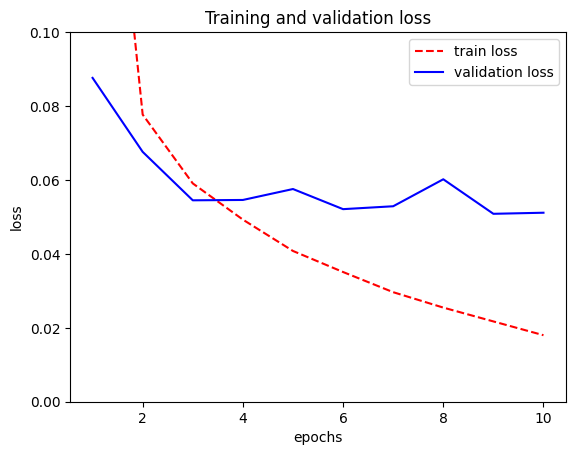

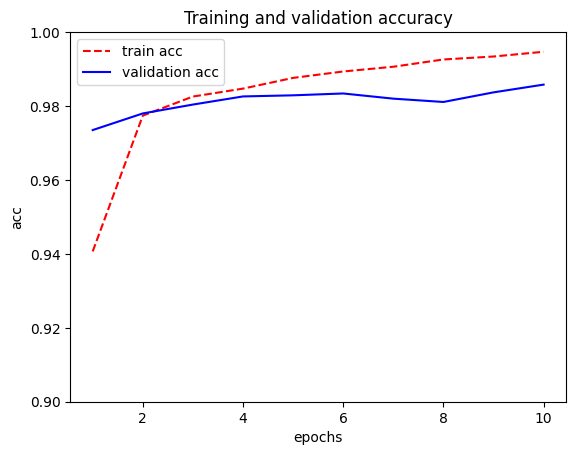

In [ ]:
acc      = history.history[ 'accuracy']
val_acc  = history.history['val_accuracy']
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(1,len(acc)+1,1)

plt.plot ( epochs,     acc, 'r--', label='Training acc'  )
plt.plot ( epochs, val_acc,  'b', label='Validation acc')
plt.title ('Training and validation accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')
plt.ylim([0.9, 1])


plt.legend(['train acc','validation acc'])
plt.figure(0)

plt.plot ( epochs,     loss, 'r--' )
plt.plot ( epochs, val_loss ,  'b' )
plt.title ('Training and validation loss'   )
plt.ylabel('loss')
plt.xlabel('epochs')
plt.ylim([0.0, 0.1])

plt.legend(['train loss','validation loss'])
plt.figure(1)

plt.show()




https://keras.io/api/layers/convolution_layers/convolution2d/

<h1> Tarea </h1>

Crer un modelo que tenga la siguiente arquitectura y compile el mismo usando los parametros de entrenamiento del ejercicio anterior.

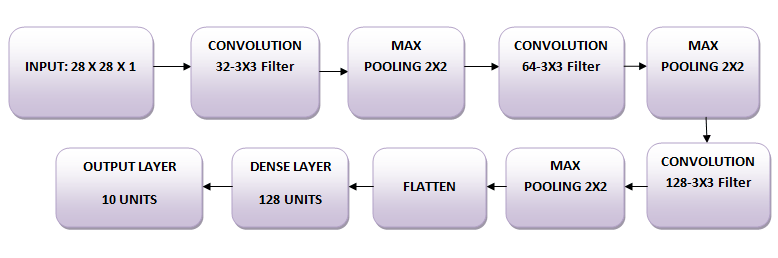